In [4]:
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite

model = read_sbml_model('yeast8.xml')

ModuleNotFoundError: No module named 'cobra'

In [8]:
xyodict = {1: "r_2104", # xylitol transport
           2: "r_1719", # D-xylose transport
           3: "r_1093", # xylose reductase
           4: "r_1092", # xylitol dehydrogenase
           5: "r_0889", # 6-phosphogluconate dehydrogenase
           6: "r_0466", # Glucose-6-phosphate dehydrogenase
           7: "r_1718", # D-xylose exchange
          }

In [15]:
medium_glu = model.medium  # 100% glucose as carbon source in the medium

medium_mod = model.medium # 50% glucose and 50% xylose as carbon sources in the medium
with model: 
    medium_mod['r_1714'] = 0.5
    medium_mod['r_1718'] = 0.5

for element in medium_mod.keys():
    print(model.reactions.get_by_id(element).name, model.reactions.get_by_id(element), medium_mod[element])

ammonium exchange r_1654: s_0420 <=>  1000.0
D-glucose exchange r_1714: s_0565 <=>  0.5
H+ exchange r_1832: s_0796 <=>  1000.0
iron(2+) exchange r_1861: s_0925 <=>  1000.0
oxygen exchange r_1992: s_1277 <=>  1000.0
phosphate exchange r_2005: s_1324 <=>  1000.0
potassium exchange r_2020: s_1374 <=>  1000.0
sodium exchange r_2049: s_1438 <=>  1000.0
sulphate exchange r_2060: s_1468 <=>  1000.0
water exchange r_2100: s_0805 <=>  1000.0
chloride exchange r_4593: s_4200 <=>  1000.0
Cu2(+) exchange r_4594: s_4201 <=>  1000.0
Mn(2+) exchange r_4595: s_4202 <=>  1000.0
Zn(2+) exchange r_4596: s_4203 <=>  1000.0
Mg(2+) exchange r_4597: s_4204 <=>  1000.0
Ca(2+) exchange r_4600: s_4199 <=>  1000.0
D-xylose exchange r_1718: s_0579 -->  0.5


In [55]:
with model:
    
    #MODEL MEDIUM
    model.medium = medium_mod # 60% glucose and 40% xylose as carbon sources in the medium

    #BUILD THE MUTANTS
    model.reactions.r_1719.bounds = (0,10) # regulation for xylose transporter
    model.reactions.r_1093.bounds = (0,10) # regulation for xylose reductase
    model.genes.YLR070C.knock_out() # knockout for xylitol dehydrogenase
    model.reactions.r_2104.bounds = (0.75*medium_mod['r_1718'],1) # regulation for xylitol transporter
    model.reactions.r_0889.bounds = (0,10) # 6-phosphogluconate dehydrogenase
    model.reactions.r_0466.bounds = (0,10) # Glucose-6-phosphate dehydrogenase

    
    with model:
        model.objective = model.reactions.r_2111  # Assuming XYLR is the reaction for xylitol production
        growth = model.optimize().objective_value
    print('Maximum theoretical cell growth:', growth, 'mmol/gDW*h')

   
    with model:
        model.objective = model.reactions.r_1093  # Assuming XYLR is the reaction for xylitol production
        xylitol_production = model.optimize().objective_value
    print('Maximum theoretical productivity of xylitol:', xylitol_production, 'mmol/gDW*h')

Maximum theoretical cell growth: 0.07462825948308904 mmol/gDW*h
Maximum theoretical productivity of xylitol: 0.10000000000000002 mmol/gDW*h


c:\Users\pauli\anaconda3\Lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
c:\Users\pauli\anaconda3\Lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
C:\Users\pauli\AppData\Local\Temp\ipykernel_39928\2359488855.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\pauli\AppData\Local\Temp\ipykernel_39928\2359488855.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\pauli\AppData\Local\Temp\ipykernel_39928\2359488855.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resul

    Glucose_to_Xylose    Growth  Xylitol_Productivity
0                 0.0  0.000000              0.000000
1                 0.1  0.005402              0.755391
2                 0.2  0.013905              0.800000
3                 0.3  0.022408              0.700000
4                 0.4  0.030910              0.600000
5                 0.5  0.039413              0.500000
6                 0.6  0.047916              0.400000
7                 0.7  0.056419              0.300000
8                 0.8  0.064922              0.200000
9                 0.9  0.073425              0.100000
10                1.0  0.081928              0.000000


C:\Users\pauli\AppData\Local\Temp\ipykernel_39928\2359488855.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


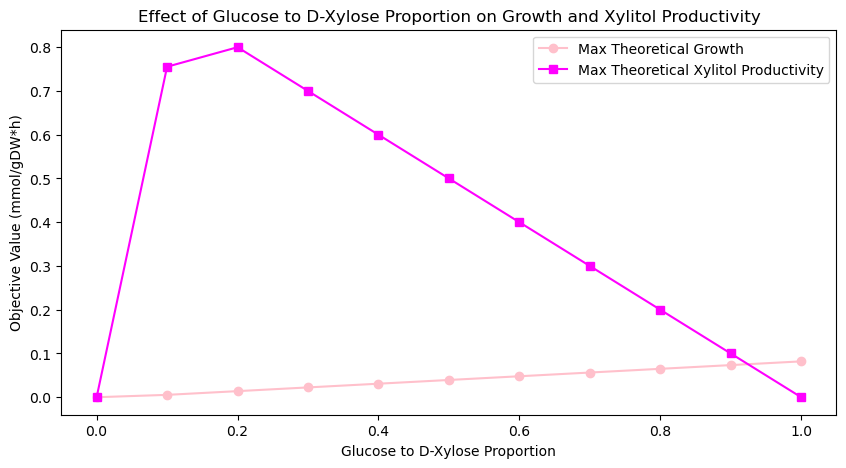

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite

# Load your model
model = read_sbml_model('yeast8.xml')

# Define the ratios of glucose-to-D-xylose to test
glucose_to_xylose_ratios = [(i, 1 - i) for i in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]]

# Prepare a DataFrame to store the results
results = pd.DataFrame(columns=['Glucose_to_Xylose', 'Growth', 'Xylitol_Productivity'])

# Loop through each ratio and run the model
for glucose, xylose in glucose_to_xylose_ratios:
    with model:
        

        # Adjust medium according to the current ratio
        medium = model.medium
        medium['r_1714'] = glucose  # Replace 'r_1714' with your glucose exchange reaction ID
        medium['r_1718'] = xylose   # Replace 'r_1718' with your D-xylose exchange reaction ID
        model.medium = medium

        model.reactions.r_1719.bounds = (0,10) # regulation for xylose transporter
        model.reactions.r_1093.bounds = (0,10) # regulation for xylose reductase
        model.genes.YLR070C.knock_out() # knockout for xylitol dehydrogenase
        model.reactions.r_2104.bounds = (0,10) # regulation for xylitol transporter
        model.reactions.r_0889.bounds = (0,10) # 6-phosphogluconate dehydrogenase
        model.reactions.r_0466.bounds = (0,10) # Glucose-6-phosphate dehydrogenase
        
        # Run the optimization for growth
        growth = model.optimize().objective_value
        
        # Run the optimization for xylitol productivity
        model.objective = model.reactions.r_1093  # Replace 'r_1093' with your xylitol production reaction ID
        xylitol_production = model.optimize().objective_value
        
        # Record the results
        results = results.append({
            'Glucose_to_Xylose': glucose/(glucose + xylose), 
            'Growth': growth, 
            'Xylitol_Productivity': xylitol_production
        }, ignore_index=True)

print(results)

# Plotting the results
plt.figure(figsize=(10, 5))

# Plot the growth line
plt.plot(results['Glucose_to_Xylose'], results['Growth'], color='pink', label='Max Theoretical Growth', marker='o')

# Plot the xylitol productivity line
plt.plot(results['Glucose_to_Xylose'], results['Xylitol_Productivity'], color='magenta', label='Max Theoretical Xylitol Productivity', marker='s')

# Add labels and title
plt.xlabel('Glucose to D-Xylose Proportion')
plt.ylabel('Objective Value (mmol/gDW*h)')
plt.title('Effect of Glucose to D-Xylose Proportion on Growth and Xylitol Productivity')
plt.legend()

# Show the plot
plt.show()


C:\Users\pauli\AppData\Local\Temp\ipykernel_39928\1692850040.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\pauli\AppData\Local\Temp\ipykernel_39928\1692850040.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\pauli\AppData\Local\Temp\ipykernel_39928\1692850040.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\pauli\AppData\Local\Temp\ipykernel_39928\1692850040.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\pauli\AppData\Local\Temp\ipykernel_39928\1692850040.py:41: FutureWarnin

    Glucose_to_Xylose    Growth  Xylitol_Productivity
0                 0.0  0.066280                   1.0
1                 0.1  0.067845                   0.9
2                 0.2  0.069409                   0.8
3                 0.3  0.070974                   0.7
4                 0.4  0.072539                   0.6
5                 0.5  0.074104                   0.5
6                 0.6  0.075669                   0.4
7                 0.7  0.077234                   0.3
8                 0.8  0.078799                   0.2
9                 0.9  0.080363                   0.1
10                1.0  0.081928                   0.0


C:\Users\pauli\AppData\Local\Temp\ipykernel_39928\1692850040.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


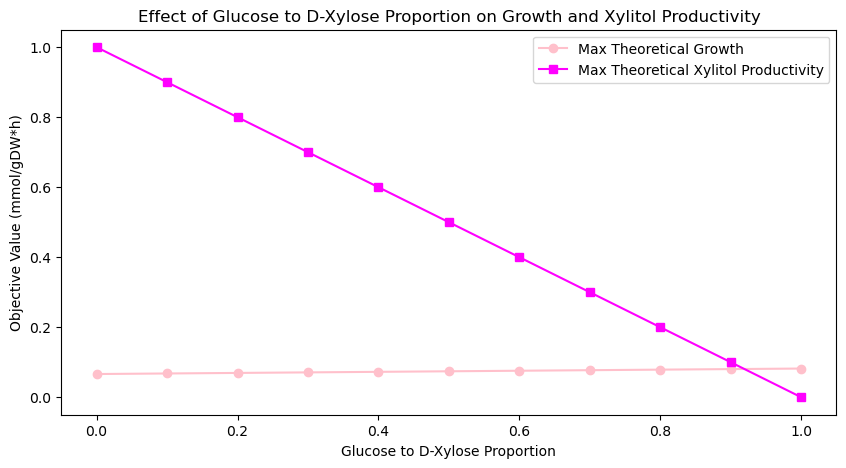

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite

# Load your model
model = read_sbml_model('yeast8.xml')

# Define the ratios of glucose-to-D-xylose to test
glucose_to_xylose_ratios = [(i, 1 - i) for i in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]]

# Prepare a DataFrame to store the results
results = pd.DataFrame(columns=['Glucose_to_Xylose', 'Growth', 'Xylitol_Productivity'])

# Loop through each ratio and run the model
for glucose, xylose in glucose_to_xylose_ratios:
    with model:
        

        # Adjust medium according to the current ratio
        medium = model.medium
        medium['r_1714'] = glucose  # Replace 'r_1714' with your glucose exchange reaction ID
        medium['r_1718'] = xylose   # Replace 'r_1718' with your D-xylose exchange reaction ID
        model.medium = medium

        # model.reactions.r_1719.bounds = (0,10) # regulation for xylose transporter
        # model.reactions.r_1093.bounds = (0,10) # regulation for xylose reductase
        # model.genes.YLR070C.knock_out() # knockout for xylitol dehydrogenase
        # model.reactions.r_2104.bounds = (0,10) # regulation for xylitol transporter
        # model.reactions.r_0889.bounds = (0,10) # 6-phosphogluconate dehydrogenase
        # model.reactions.r_0466.bounds = (0,10) # Glucose-6-phosphate dehydrogenase
        
        # Run the optimization for growth
        growth = model.optimize().objective_value
        
        # Run the optimization for xylitol productivity
        model.objective = model.reactions.r_1093  # Replace 'r_1093' with your xylitol production reaction ID
        xylitol_production = model.optimize().objective_value
        
        # Record the results
        results = results.append({
            'Glucose_to_Xylose': glucose/(glucose + xylose), 
            'Growth': growth, 
            'Xylitol_Productivity': xylitol_production
        }, ignore_index=True)

print(results)

# Plotting the results
plt.figure(figsize=(10, 5))

# Plot the growth line
plt.plot(results['Glucose_to_Xylose'], results['Growth'], color='pink', label='Max Theoretical Growth', marker='o')

# Plot the xylitol productivity line
plt.plot(results['Glucose_to_Xylose'], results['Xylitol_Productivity'], color='magenta', label='Max Theoretical Xylitol Productivity', marker='s')

# Add labels and title
plt.xlabel('Glucose to D-Xylose Proportion')
plt.ylabel('Objective Value (mmol/gDW*h)')
plt.title('Effect of Glucose to D-Xylose Proportion on Growth and Xylitol Productivity')
plt.legend()

# Show the plot
plt.show()


BIOTIN EXAMPLE

In [5]:
pip install cobra


     ---------------------------------------- 1.2/1.2 MB 4.7 MB/s eta 0:00:00
     --------------------------------------- 15.8/15.8 MB 14.2 MB/s eta 0:00:00
     -------------------------------------- 142.0/142.0 KB 8.8 MB/s eta 0:00:00
     ------------------------------------- 395.8/395.8 KB 12.4 MB/s eta 0:00:00
     -------------------------------------- 116.4/116.4 KB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 10.7/10.7 MB 9.4 MB/s eta 0:00:00
  Using cached diskcache-5.6.3-py3-none-any.whl (45 kB)
     ------------------------------------- 573.1/573.1 KB 12.0 MB/s eta 0:00:00
     ---------------------------------------- 5.7/5.7 MB 10.2 MB/s eta 0:00:00
     -------------------------------------- 840.9/840.9 KB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 239.8/239.8 KB 7.4 MB/s eta 0:00:00
     ----------------------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\Pablo\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [6]:
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite

model = read_sbml_model('yeast8.xml')

In [38]:
medium_glu = model.medium  # 100% glucose as carbon source in the medium

medium_mod = model.medium # 50% glucose and 50% biotin
with model: 
    medium_mod['r_1714'] = 0.9
    medium_mod['r_1718'] = 0.1

for element in medium_mod.keys():
    print(model.reactions.get_by_id(element).name, model.reactions.get_by_id(element), medium_mod[element])


ammonium exchange r_1654: s_0420 <=>  1000.0
D-glucose exchange r_1714: s_0565 <=>  0.9
H+ exchange r_1832: s_0796 <=>  1000.0
iron(2+) exchange r_1861: s_0925 <=>  1000.0
oxygen exchange r_1992: s_1277 <=>  1000.0
phosphate exchange r_2005: s_1324 <=>  1000.0
potassium exchange r_2020: s_1374 <=>  1000.0
sodium exchange r_2049: s_1438 <=>  1000.0
sulphate exchange r_2060: s_1468 <=>  1000.0
water exchange r_2100: s_0805 <=>  1000.0
chloride exchange r_4593: s_4200 <=>  1000.0
Cu2(+) exchange r_4594: s_4201 <=>  1000.0
Mn(2+) exchange r_4595: s_4202 <=>  1000.0
Zn(2+) exchange r_4596: s_4203 <=>  1000.0
Mg(2+) exchange r_4597: s_4204 <=>  1000.0
Ca(2+) exchange r_4600: s_4199 <=>  1000.0
D-xylose exchange r_1718: s_0579 -->  0.1


In [53]:
with model:
    
    #MODEL MEDIUM
    model.medium = medium_glu

    #BUILD THE MUTANTS
    model.reactions.r_1719.bounds = (0,10) # regulation for xylose transporter
    model.reactions.r_0961.bounds = (0,10) # regulation for pyruvate desHase E2 component
    #model.reactions.r_0112.bounds = (0,10) # regulation for acetyl-CoA synthetase
    #model.reactions.r_0173.bounds = (0,10) # regulation for aldehyde desHase which prodcues acetate from acetaldehyde in a bidirectional reaction
    #model.genes.YDL080C.knock_out() # knockout for BLP1                       
    #model.reactions.r_0466.bounds = (0,10) # Glucose-6-phosphate dehydrogenase

    
    with model:
        model.objective = model.reactions.r_2111 #We maximize the growth
        growth = model.optimize().objective_value
    print('Maximum theoretical cell growth:', growth, 'mmol/gDW*h')

   
    with model:
        model.objective = model.reactions.r_0961  # Biotin synthase is the reaction that produces biotin
        biotin_production = model.optimize().objective_value
    print('Maximum theoretical productivity of Acetil-CoA:', biotin_production, 'mmol/gDW*h')

Maximum theoretical cell growth: 0.08192811087167359 mmol/gDW*h
Maximum theoretical productivity of Acetil-CoA: 3.9999999999999325 mmol/gDW*h


In [40]:
reaction_id = 'r_0173'  # Reemplaza esto con el ID real de la reacción que estás buscando
if reaction_id in model.reactions:
    print(f"La reacción {reaction_id} existe en el modelo.")
    reaction = model.reactions.get_by_id(reaction_id)
    print(reaction)
else:
    print(f"La reacción {reaction_id} no se encuentra en el modelo.")

# Esto imprimirá información detallada de la reacción si existe
print("Reacción: ", reaction.reaction)
print("Nombre: ", reaction.name)
print("Substratos: ", reaction.reactants)
print("Productos: ", reaction.products)
print("Reversible: ", reaction.reversibility)


La reacción r_0173 existe en el modelo.
r_0173: s_0359 + s_0803 + s_1207 --> s_0362 + 2.0 s_0794 + s_1212
Reacción:  s_0359 + s_0803 + s_1207 --> s_0362 + 2.0 s_0794 + s_1212
Nombre:  aldehyde dehydrogenase (acetaldehyde, NADP)
Substratos:  [<Metabolite s_0359 at 0x215c5bcf970>, <Metabolite s_0803 at 0x215c5c38bb0>, <Metabolite s_1207 at 0x215c4ac0040>]
Productos:  [<Metabolite s_0362 at 0x215c5bcff70>, <Metabolite s_0794 at 0x215c5c38c10>, <Metabolite s_1212 at 0x215c4ac3ee0>]
Reversible:  False
